In [1]:

import numpy as np
import pandas as pd
from numpy import linalg as LA
from scipy.spatial.distance import cdist
import math
import random
import copy
c=2
m=2
e=0.01
dz=pd.read_excel('Comparisons - as given to MEC Students.xlsx',sheet_name='Data Set 7',header=None)
#data=dz.drop([11800,11801,11802,11803,11804])
#data.columns=['x','y']
#Z=np.array(data.drop(columns=['If Breakout Case']))


In [2]:
dz

,0,1
0,5.5607,5.1980
1,2.8222,4.6723
2,3.8615,5.2383
3,7.4969,4.7704
4,4.5587,4.5600
5,6.3981,5.6169
6,5.2551,4.7252
7,4.8356,4.3989
8,4.2523,4.9077
9,5.2730,3.2702


In [43]:
dz.columns=['x','y']

Z=np.array(dz)


In [44]:
def part_mat(df,cluster):
    U=np.random.randint(2,size=(len(df),cluster))
    return U

In [45]:
def cluster_mean(Z,U,m):
    N = len(Z)
    n = len(Z[0])
    c = len(U[0])
    v = np.zeros((c,n))
    temp_u = np.zeros((N,c))
    for i in range(0,N):
        for j in range(0,c):
            temp_u[i][j] =((U[i][j])**m)
    for j in range(0,c):
        for k in range(0,n):
            numr = 0
            deno = 0
            for i in range(0,N):
                numr = numr + temp_u[i][j] * Z[i][k]
                deno = deno + temp_u[i][j]
            v[j][k] = numr/deno
    return v


In [46]:
def distance(v,Z):
    N = len(Z)
    n = len(Z[0])
    c = len(v)
    D = np.zeros((N,c))
    
    for i in range(0,N):
        for j in range(0,c):
            temp1 = np.subtract(Z[i],v[j])
            
            temp2 = np.transpose(temp1)
            temp3 = np.matmul(temp2,temp1)
            
            
            D[i][j] = math.sqrt(temp3)
    
    return D

In [47]:
def update(D,a,b,m):
    p = 2.0/(m-1)
    N = len(D)
    c = len(D[0])
    new_U = np.zeros((a,b))
    for i in range(0,N):
        temp1 = 1
        for j in range(0,c):
            if (D[i][j] <= 0):
                temp1 = 0
                break
        if (temp1 == 1):
            for j in range(0,c):
                temp2 = 0
                for k in range(0,c):
                    x = float(D[i][j])/D[i][k]
                    temp2 = temp2 + (x**p)
                new_U[i][j] = 1.0/temp2
        else:
            for j in range(0,c):
                if (D[i][k] == 0):
                    new_U[i][j] = 1
                else:
                    new_U[i][j] = 0
    return new_U



In [48]:
def j(Z,v,U,m):
    c = len(v)
    N = len(Z)
    cost = 0
    for i in range(0,N):
        for j in range(0,c):
            temp1 = np.subtract(Z[i],v[j])
            temp2 = np.linalg.norm(temp1)
            cost = cost + ((temp2**2) * ((U[i][j])**m))
    return cost

In [49]:
def fuzzy_c(Z,cluster,m,e):
    U=part_mat(Z,cluster)
    kq=0
    
    while(True):
        U_old=copy.deepcopy(U)
        v=cluster_mean(Z,U,m)
        dis=distance(v,Z)
        U=update(dis,len(U),len(U[0]),m)
        
        kq+=1
        
        if(LA.norm(np.subtract(U,U_old))<e):
            cost=j(Z,v,U,m)
            
            break
    return U,kq,cost,v

In [50]:

costs=[]
centers=[]
iters=[]
for i in range(2,11):
    U,ite,cost,cen=fuzzy_c(Z,i,m,e)
    costs.append(cost)
    centers.append(cen)
    iters.append(ite)



No handles with labels found to put in legend.


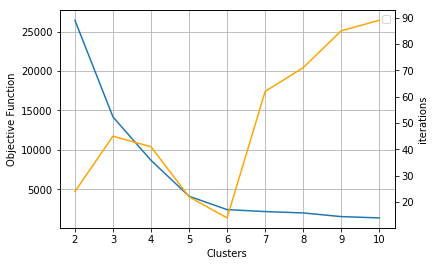

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(2,11), costs)

ax2 = ax.twinx()
ax2.plot(range(2,11), iters, label='iterations',color='orange')
ax.legend()
ax.grid()
ax.set_xlabel("Clusters")
ax.set_ylabel('Objective Function')
ax2.set_ylabel('iterations')

plt.show()

In [55]:
u=fuzzy_c(Z,6,m,e)[0]
centers=fuzzy_c(Z,6,m,e)[3]

In [56]:
mem=u.argmax(axis=1)


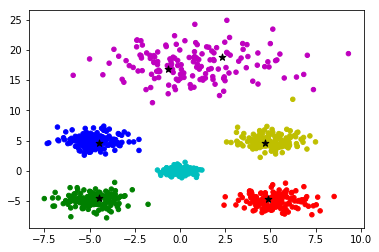

In [57]:
colors=['r','b','g','y','c','m']

f=lambda x: colors[int(x)]

mem=list(map(f,mem))
plt.scatter(Z[:,0],Z[:,1],c=mem,s=20)
plt.scatter(centers[:,0],centers[:,1],c='black',s=50,marker='*')

In [58]:
thmem=[]
for i in range(len(u)):
    for j in range(len(u[0])):
        if(u[i][j]>=0.5):
            thmem.append(j)
      

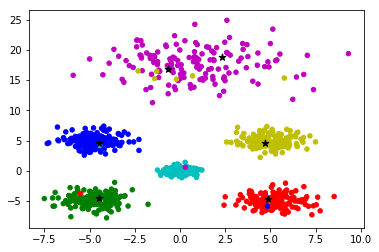

In [59]:
thmem=list(map(f,thmem))
plt.scatter(Z[:,0],Z[:,1],c=thmem,s=20)
plt.scatter(centers[:,0],centers[:,1],c='black',s=50,marker='*')

In [54]:
with pd.ExcelWriter('cluster_assing.xlsx') as writer:
    df_norm.to_excel(writer,sheet_name='fuzzy')

In [55]:
norm_u=normalise(u)

In [13]:
df_norm_u=pd.DataFrame(u)
with pd.ExcelWriter('cluster_assing.xlsx') as writer:
    df_norm_u.to_excel(writer,sheet_name='fuzzy_norm')

In [36]:
def find_max(arr):
    maxs=[]
    for i in range(len(arr)):
        r=(arr[i].max())
        #print(r)
        for j in range(len(arr[0])):
            if(arr[i][j]==r):
                maxs.append(j)
    return maxs

In [38]:
k=find_max(u)

In [39]:
data['cluster']=k

In [43]:
val,count0=np.unique(data['If Breakout Case'][data['cluster']==0], return_counts=True)
val,count1=np.unique(data['If Breakout Case'][data['cluster']==1], return_counts=True)

val,count2=np.unique(data['If Breakout Case'][data['cluster']==2], return_counts=True)

val,count3=np.unique(data['If Breakout Case'][data['cluster']==3], return_counts=True)



In [44]:

count0,count1,count2,count3

(array([1456, 1622]), array([3652, 1196]), array([3092,  582]), array([200]))

array([0.])

In [61]:

costs

[26463.227512041783,
 14177.825716359923,
 8666.845270295877,
 4106.617096981686,
 2405.2642343085686,
 2159.629745412085,
 1984.3373669488283,
 1517.6401875505699,
 1351.6347165334864]